<a href="https://colab.research.google.com/github/Gauravds435/colabtools/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving Car Prices.csv to Car Prices.csv


In [ ]:
for fn in uploaded.keys():
  print("User uploaded file'{name}' with length {length} bytes".format(name = fn, length=len(uploaded[fn])))

User uploaded file'Car Prices.csv' with length 26717 bytes


In [ ]:
uploaded

{'Car Prices.csv': b'car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price\r\n1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n6,2,audi fox,gas,std,two,sedan,fwd,front,99.

In [ ]:
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded["Car Prices.csv"].decode("utf-8")))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.drop(['car_ID', 'symboling','aspiration', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio','citympg', 'highwaympg'], axis = 1, inplace = True)

In [ ]:
df.describe()

,enginesize,horsepower,peakrpm,price
count,205.000000,205.000000,205.000000,205.000000
mean,126.907317,104.117073,5125.121951,13276.710571
std,41.642693,39.544167,476.985643,7988.852332
min,61.000000,48.000000,4150.000000,5118.000000
25%,97.000000,70.000000,4800.000000,7788.000000
50%,120.000000,95.000000,5200.000000,10295.000000
75%,141.000000,116.000000,5500.000000,16503.000000
max,326.000000,288.000000,6600.000000,45400.000000


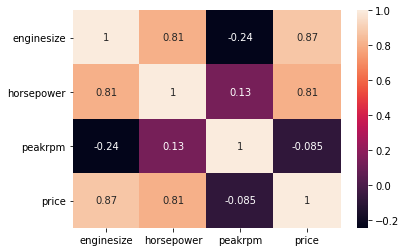

In [ ]:
import seaborn as sns
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


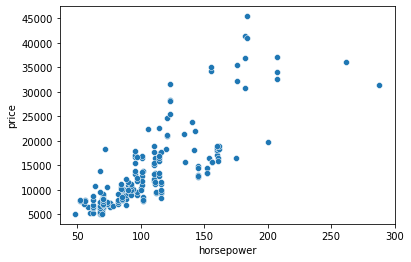

In [ ]:
x = df["horsepower"]
y = df["price"]
sns.scatterplot(x, y)

In [ ]:
import statsmodels.api as sm 
price=df["price"]
horsepower = sm.add_constant(df[["horsepower"]])
horsepower

,const,horsepower
0,1.0,111
1,1.0,111
2,1.0,154
3,1.0,102
4,1.0,115
...,...,...
200,1.0,114
201,1.0,160
202,1.0,134
203,1.0,106


In [ ]:
# OLS model
mod = sm.OLS(price, horsepower)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.48e-48
Time:                        07:16:54   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [ ]:
import math
import numpy as np
def RSE(y_true, y_predicted):
  y_true = np.array(y_true)
  y_predicted = np.array(y_predicted)
  RSS = np.sum(np.square(y_true-y_predicted))
  rse = math.sqrt(RSS / (len(y_true) - 2))
  return rse

In [ ]:
rse = RSE(df["price"], results.predict())
print(rse)

4716.94591482841


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


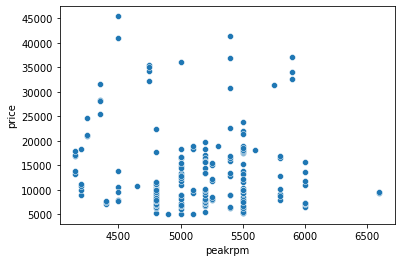

In [ ]:
x1 = df["peakrpm"]
y1 = df["price"]
sns.scatterplot(x1, y1)

In [ ]:
price1 = df["price"]
peak1 = sm.add_constant(df["peakrpm"])
print(peak1)

     const  peakrpm
0      1.0     5000
1      1.0     5000
2      1.0     5000
3      1.0     5500
4      1.0     5500
..     ...      ...
200    1.0     5400
201    1.0     5300
202    1.0     5500
203    1.0     4800
204    1.0     5400

[205 rows x 2 columns]


In [ ]:
mod1 = sm.OLS(price1, peak1)
results1 = mod1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.487
Date:                Thu, 08 Oct 2020   Prob (F-statistic):              0.224
Time:                        07:26:54   Log-Likelihood:                -2131.7
No. Observations:                 205   AIC:                             4267.
Df Residuals:                     203   BIC:                             4274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.06e+04   6028.571      3.416      0.0